In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib as plt
from matplotlib import *
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure

from dataprep.eda import *
from dataprep.eda.missing import plot_missing
from dataprep.eda import plot_correlation

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

NumExpr defaulting to 8 threads.


In [2]:
df=pd.read_csv('Covid Dataset.csv')

In [3]:
df.head()

Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
0               Yes   Yes       Yes         Yes          Yes     No   
1               Yes   Yes       Yes         Yes           No    Yes   
2               Yes   Yes       Yes         Yes          Yes    Yes   
3               Yes   Yes       Yes          No           No    Yes   
4               Yes   Yes       Yes         Yes          Yes     No   

  Chronic Lung Disease Headache Heart Disease Diabetes  ... Fatigue   \
0                   No       No            No      Yes  ...      Yes   
1                  Yes      Yes            No       No  ...      Yes   
2                  Yes      Yes            No      Yes  ...      Yes   
3                   No       No           Yes      Yes  ...       No   
4                  Yes      Yes           Yes      Yes  ...       No   

  Gastrointestinal  Abroad travel Contact with COVID Patient  \
0               Yes            No                        Yes   
1                No            No                         No   
2               Yes           Yes                         No   
3                No           Yes                         No   
4               Yes            No                        Yes   

  Attended Large Gathering Visited Public Exposed Places  \
0                       No                           Yes   
1                      Yes                           Yes   
2                       No                            No   
3                      Yes                           Yes   
4                       No                           Yes   

  Family working in Public Exposed Places Wearing Masks  \
0                                     Yes            No   
1                                      No            No   
2                                      No            No   
3                                      No            No   
4                                      No            No   

  Sanitization from Market COVID-19  
0                       No      Yes  
1                       No      Yes  
2                       No      Yes  
3                       No      Yes  
4                       No      Yes  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [5]:
le=preprocessing.LabelEncoder()

In [6]:
df=df.apply(le.fit_transform)

<AxesSubplot:title={'center':'Symptoms and Covid Correlation'}>

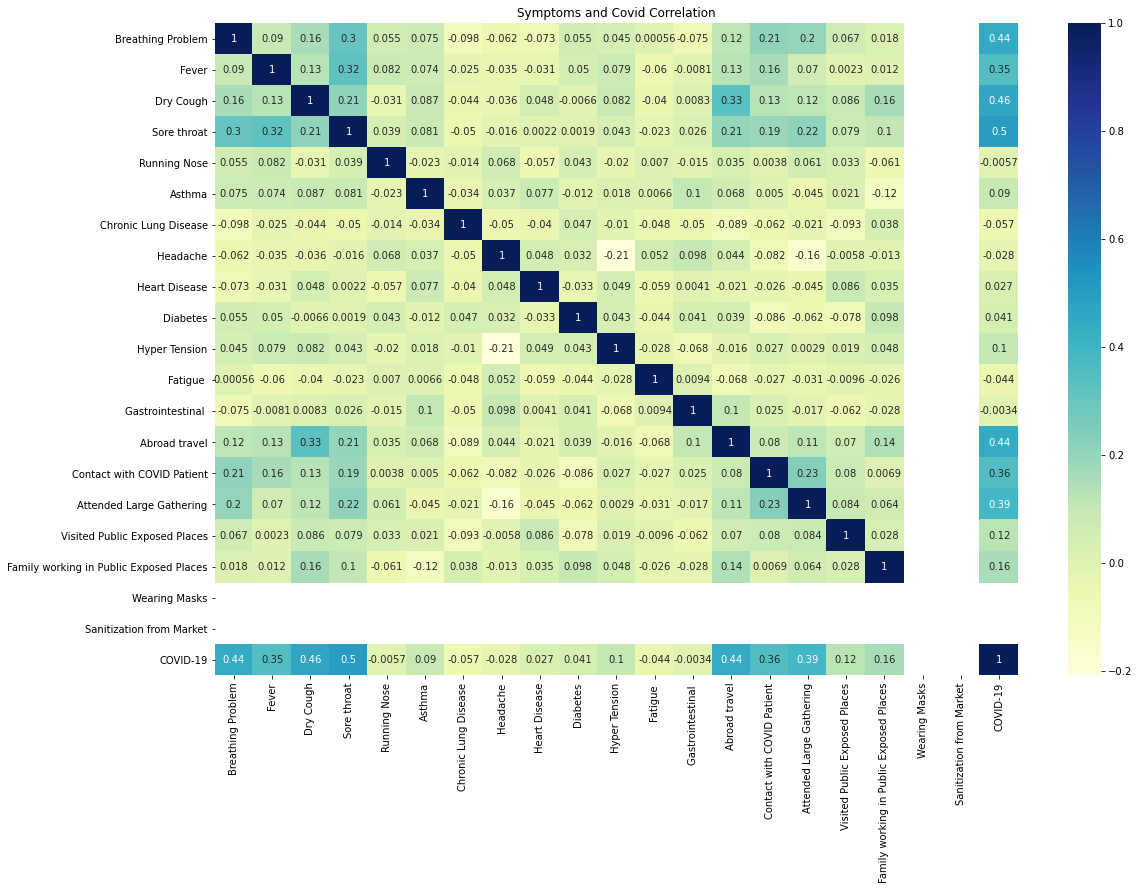

In [7]:
plt.figure(figsize = (18, 12))
plt.title("Symptoms and Covid Correlation")
sns.heatmap(data=df.corr(), annot=True, cmap="YlGnBu")

In [8]:
df.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

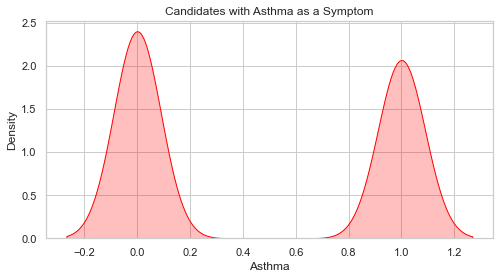

In [9]:
plt.figure(figsize=(8,4))
sns.set_theme(style="whitegrid")
sns.kdeplot(df['Asthma'], color="red",shade=True)
plt.title("Candidates with Asthma as a Symptom")
plt.xlabel("Asthma")
plt.ylabel("Density")
plt.show()

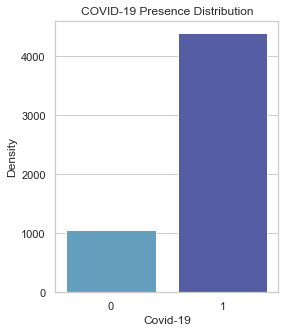

In [10]:
plt.figure(figsize=(4,5))
sns.set_palette("icefire")
sns.countplot(df['COVID-19'])
plt.title("COVID-19 Presence Distribution")
plt.xlabel("Covid-19")
plt.ylabel("Density")
plt.show()

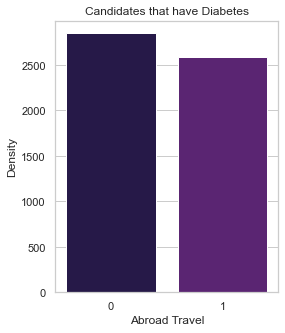

In [11]:
plt.figure(figsize=(4,5))
sns.set_palette("magma")
sns.countplot(df['Diabetes'])
plt.title("Candidates that have Diabetes")
plt.xlabel("Abroad Travel")
plt.ylabel("Density")
plt.show()

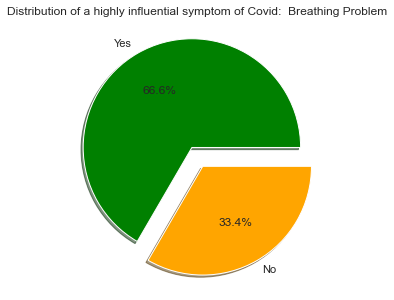

In [12]:
labels=['Yes', "No"]
figure(figsize=(7, 5))
color=['green', 'orange']
plt.pie(df['Breathing Problem'].value_counts(),labels=labels, explode = [0.1,0.1],autopct='%1.1f%%', shadow = True,colors=color)
plt.title('Distribution of a highly influential symptom of Covid:  Breathing Problem');
plt.show() 

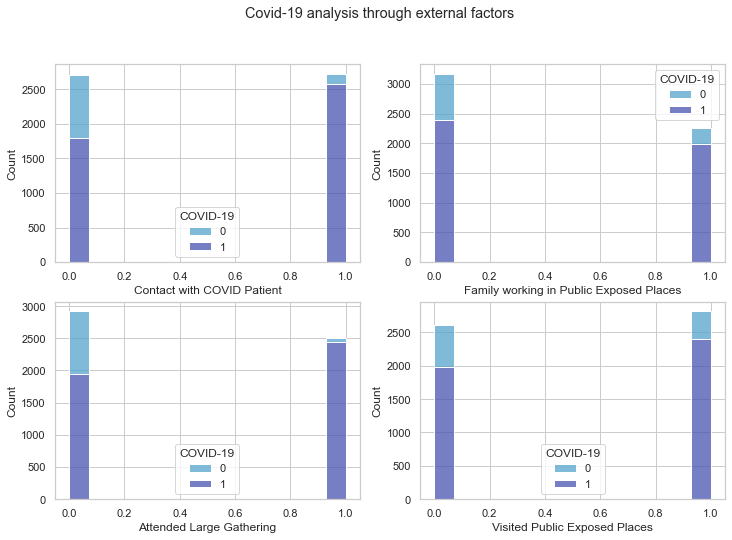

In [13]:
fig, axs = plt.subplots(2,2, figsize=(12,8))
sns.set_palette("icefire")
sns.histplot(x='Contact with COVID Patient',hue='COVID-19',data=df, multiple="stack",ax=axs[0, 0])
sns.histplot(x='Family working in Public Exposed Places',hue='COVID-19',data=df, multiple="stack",ax=axs[0, 1])
sns.histplot(x='Attended Large Gathering',hue='COVID-19',data=df, multiple="stack",ax=axs[1, 0])
sns.histplot(x='Visited Public Exposed Places',hue='COVID-19',data=df, multiple="stack",ax=axs[1, 1])


fig.suptitle("Covid-19 analysis through external factors")
plt.show()

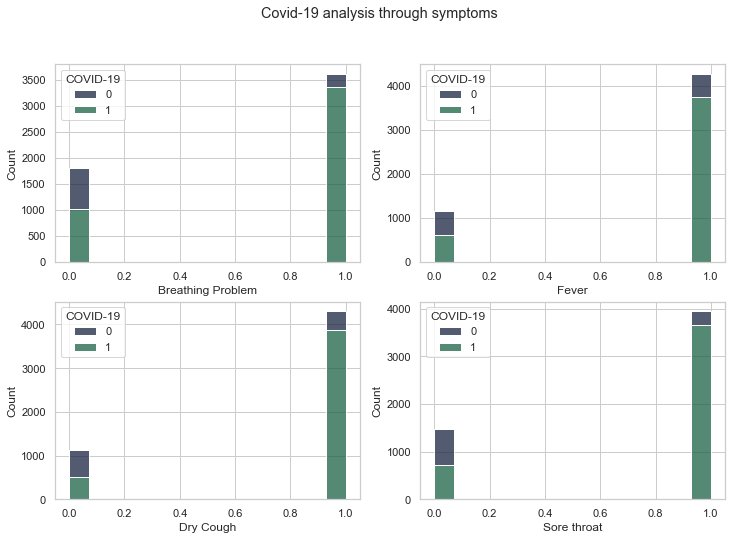

In [14]:
fig, axs = plt.subplots(2,2, figsize=(12,8))
sns.set_palette("cubehelix")
sns.histplot(x='Breathing Problem',hue='COVID-19',data=df, multiple="stack",ax=axs[0, 0])
sns.histplot(x='Fever',hue='COVID-19',data=df, multiple="stack",ax=axs[0, 1])
sns.histplot(x='Dry Cough',hue='COVID-19',data=df, multiple="stack",ax=axs[1, 0])
sns.histplot(x='Sore throat',hue='COVID-19',data=df, multiple="stack",ax=axs[1, 1])


fig.suptitle("Covid-19 analysis through symptoms")
plt.show()

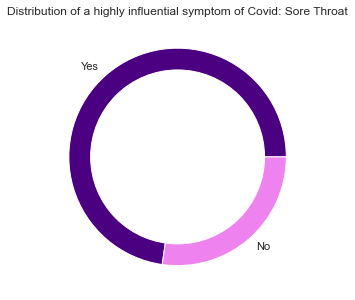

In [15]:
labels=['Yes', "No"]
figure(figsize=(7, 5))
color=['indigo', 'violet']
plt.pie(df['Sore throat'].value_counts(),labels=labels,colors=color)
plt.title('Distribution of a highly influential symptom of Covid: Sore Throat')

my_circle=plt.Circle( (0,0), 0.8, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show() 

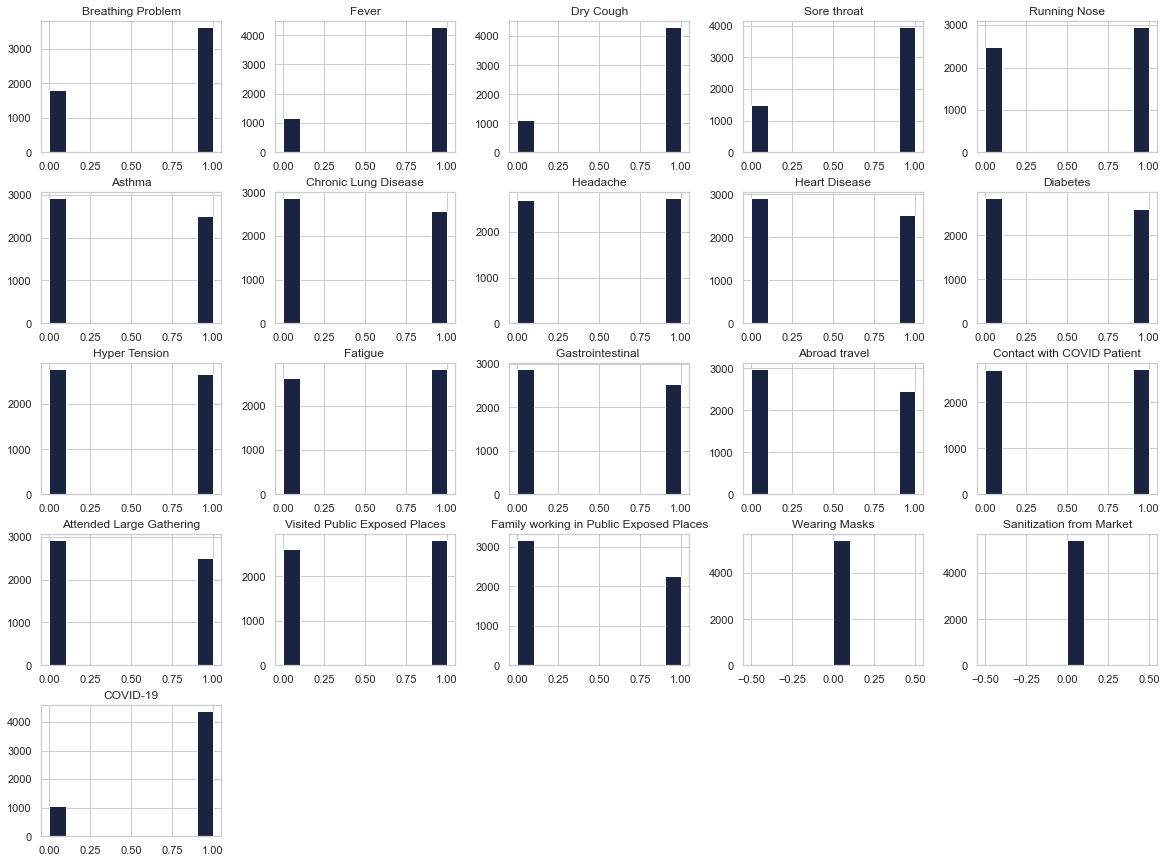

In [16]:
df.hist(figsize=(20,15));

In [17]:
df=df.drop(columns=['Wearing Masks','Sanitization from Market'])


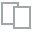
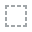
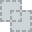
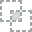
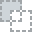
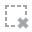
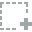
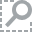
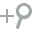
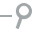
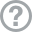
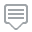
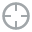
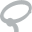
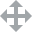
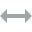
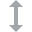
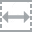
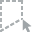
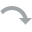
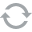
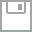
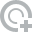
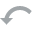
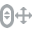
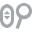
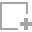
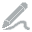
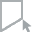
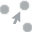
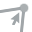
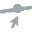

In [18]:
plot_correlation(df)

##### Dropping columns with low Correlation

In [19]:
df=df.drop(columns=['Running Nose','Chronic Lung Disease','Headache', 'Heart Disease', 'Diabetes', 'Gastrointestinal ', 'Asthma','Fatigue ' ])

##### Modelling

In [20]:
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [111]:
x=df.iloc[ : , :-1]
y=df.iloc[ : , -1]

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_lr=model.score(x_test, y_test)*100
accuracy_lr

96.22815087396505

In [24]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_svm=clf.score(x_test, y_test)*100
accuracy_svm

97.148114075437

In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
accuracy_gnb= model.score(x_test, y_test)*100
accuracy_gnb

75.34498620055197

In [26]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
accuracy_dtc=dtc.score(x_test, y_test)*100
accuracy_dtc

97.05611775528979

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_knn=knn.score(x_test, y_test)*100
accuracy_knn

96.59613615455382

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train, y_train)
accuracy_rf=model.score(x_test, y_test)*100
accuracy_rf

97.05611775528979

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=4)
gbc.fit(x_train, y_train)
accuracy_gbc=gbc.score(x_test, y_test)*100
accuracy_gbc

97.05611775528979

In [30]:
import keras

In [113]:
x_val = x_train[-500:]
y_val = y_train[-500:]
x_train=x_train[:-500]
y_train=y_train[:-500]

In [95]:
3import tensorflow as tf
#y_train=tf.keras.utils.to_categorical(y_train)
#y_val=tf.keras.utils.to_categorical(y_val)

In [114]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense

model = Sequential()

model.add(Dense(12, activation='relu', input_shape=(10,)))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [115]:
optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
                   
history= model.fit(x_train, y_train, epochs=75,batch_size=2,  verbose=1, validation_data=(x_val, y_val))

Epoch 1/75
1924/1924 [==============================] - 2s 592us/step - loss: 0.5843 - accuracy: 0.7030 - val_loss: 0.4265 - val_accuracy: 0.8000
Epoch 2/75
1924/1924 [==============================] - 1s 526us/step - loss: 0.4826 - accuracy: 0.7966 - val_loss: 0.3819 - val_accuracy: 0.8000
Epoch 3/75
1924/1924 [==============================] - 1s 563us/step - loss: 0.4770 - accuracy: 0.7880 - val_loss: 0.3617 - val_accuracy: 0.8000
Epoch 4/75
1924/1924 [==============================] - 1s 550us/step - loss: 0.4479 - accuracy: 0.8107 - val_loss: 0.3438 - val_accuracy: 0.8000
Epoch 5/75
1924/1924 [==============================] - 1s 533us/step - loss: 0.4243 - accuracy: 0.8100 - val_loss: 0.3271 - val_accuracy: 0.8000
Epoch 6/75
1924/1924 [==============================] - 1s 538us/step - loss: 0.4239 - accuracy: 0.8063 - val_loss: 0.3103 - val_accuracy: 0.8000
Epoch 7/75
1924/1924 [==============================] - 1s 537us/step - loss: 0.4073 - accuracy: 0.8221 - val_loss: 0.2963 -

Epoch 57/75
1924/1924 [==============================] - 1s 519us/step - loss: 0.1646 - accuracy: 0.9328 - val_loss: 0.0852 - val_accuracy: 0.9680
Epoch 58/75
1924/1924 [==============================] - 1s 520us/step - loss: 0.1562 - accuracy: 0.9382 - val_loss: 0.0851 - val_accuracy: 0.9660
Epoch 59/75
1924/1924 [==============================] - 1s 519us/step - loss: 0.1599 - accuracy: 0.9331 - val_loss: 0.0848 - val_accuracy: 0.9660
Epoch 60/75
1924/1924 [==============================] - 1s 523us/step - loss: 0.1601 - accuracy: 0.9340 - val_loss: 0.0845 - val_accuracy: 0.9660
Epoch 61/75
1924/1924 [==============================] - 1s 515us/step - loss: 0.1708 - accuracy: 0.9223 - val_loss: 0.0839 - val_accuracy: 0.9660
Epoch 62/75
1924/1924 [==============================] - 1s 513us/step - loss: 0.1530 - accuracy: 0.9322 - val_loss: 0.0827 - val_accuracy: 0.9660
Epoch 63/75
1924/1924 [==============================] - 1s 514us/step - loss: 0.1592 - accuracy: 0.9358 - val_loss: 0

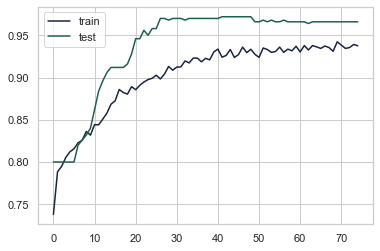

In [116]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [117]:
y_pred=model.predict(x_test)

In [119]:
y_pred=np.where(y_pred>0.5,1,0)

In [120]:
accuracy_score(y_test, y_pred)

0.9742410303587856